## 2.2 Bike Sharing: Predicción de Demanda Horaria

Los sistemas de intercambio de bicicletas son un medio para alquilar bicicletas en las que el proceso de obtención de membresía, alquiler y retorno de bicicletas se automatiza a través de una red de ubicaciones de quioscos en toda la ciudad. Utilizando estos sistemas, la gente puede alquilar una bicicleta desde una ubicación y devolverla a un lugar diferente según sea necesario. Actualmente, hay más de 500 programas para compartir bicicletas en todo el mundo.

Los datos generados por estos sistemas los hacen atractivos para los investigadores debido a que se registran explícitamente la duración del viaje, la ubicación de salida, la ubicación de llegada y el tiempo transcurrido. Por lo tanto, los sistemas de compartimiento de bicicletas funcionan como una red de sensores, que puede utilizarse para estudiar la movilidad en una ciudad. En esta competición, se pide a los participantes que combinen los patrones de uso histórico con los datos meteorológicos para predecir la demanda de alquiler de bicicletas en el programa Capital Bikeshare en Washington, DC.

El set de datos está representado por las siguientes características y valores posibles:

<img src="image1.png">

Se desea obtener el mejor puntaje posible para la función proporcionada para el concurso:  

$$E_{bikes}(y,\hat{y}) = \frac{1}{x} \sum_i (\ln{(y_i + 1)} - \ln{(\hat{y}_i + 1)})^2   $$

En donde $y$ e $\hat{y}$ son los valores reales y de predicción respectivamente.



Para la realización, primero se construye un dataframe extrayendo el valor de la hora del día desde los datos de fecha y hora de registro para incorporarlos como característica numérica al problema.


### 2.2.a. Construcción de dataframe con los datos a analizar.

In [2]:
#2.a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
print(df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

Se grafican la mayoría de las características respecto a la cantidad de registros.

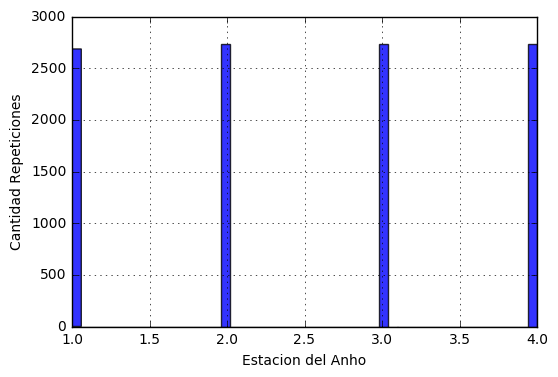

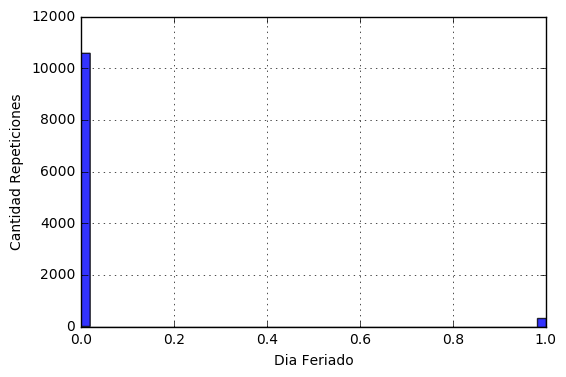

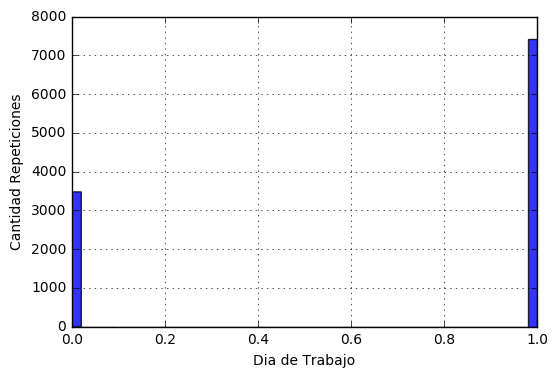

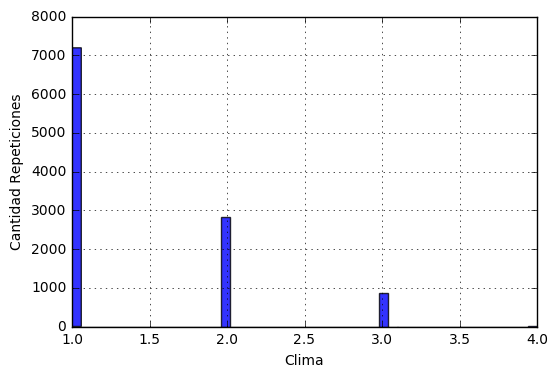

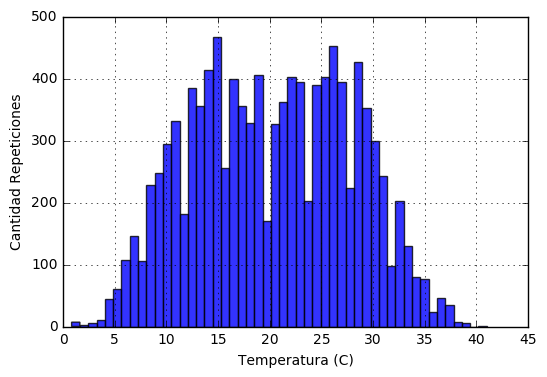

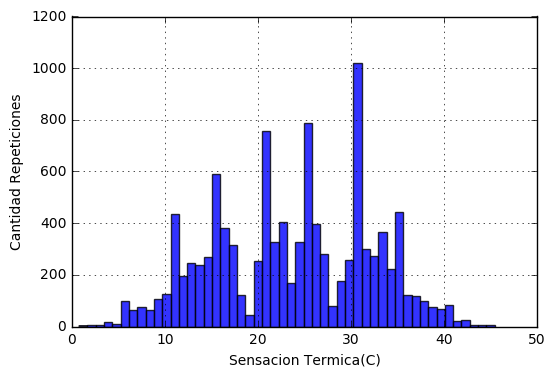

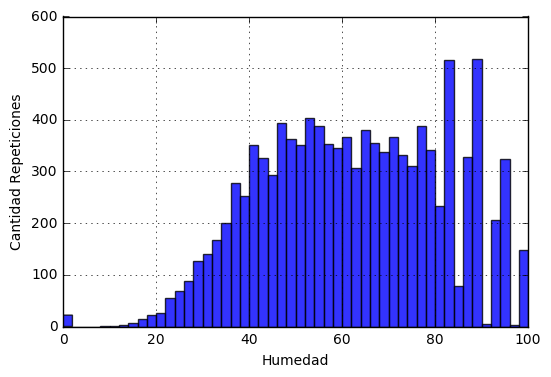

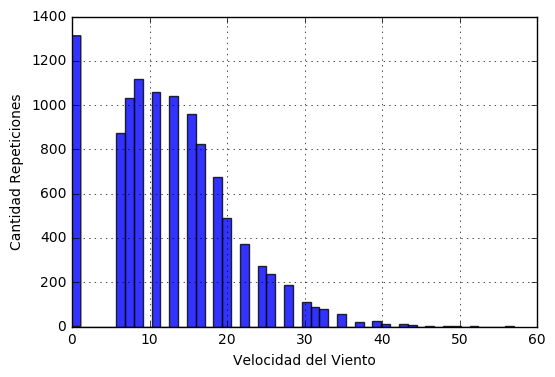

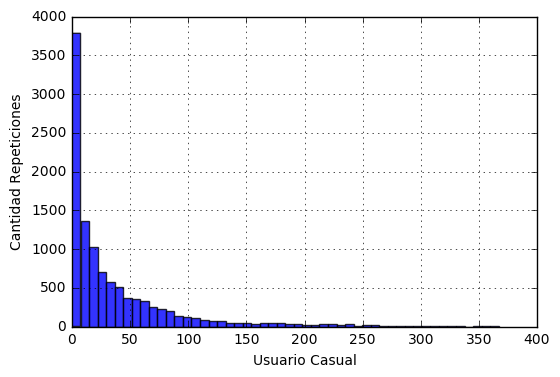

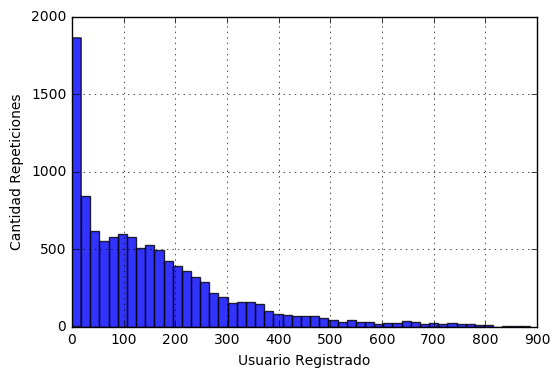

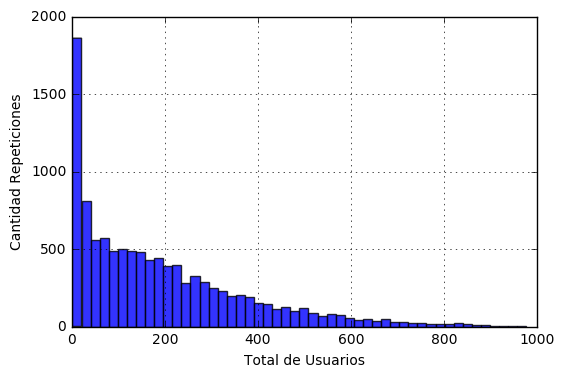

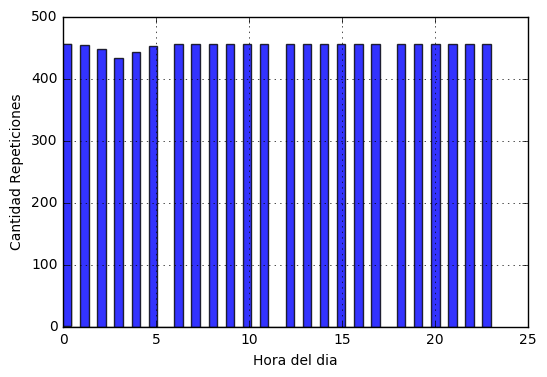

In [3]:
#2.a Gráficos

df.ix[:,'season'].hist(alpha=0.8, bins=50)
plt.xlabel('Estacion del Anho')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'holiday'].hist(alpha=0.8, bins=50)
plt.xlabel('Dia Feriado')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'workingday'].hist(alpha=0.8, bins=50)
plt.xlabel('Dia de Trabajo')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'weather'].hist(alpha=0.8, bins=50)
plt.xlabel('Clima')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'temp'].hist(alpha=0.8, bins=50)
plt.xlabel('Temperatura (C)')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'atemp'].hist(alpha=0.8, bins=50)
plt.xlabel('Sensacion Termica(C)')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'humidity'].hist(alpha=0.8, bins=50)
plt.xlabel('Humedad')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'windspeed'].hist(alpha=0.8, bins=50)
plt.xlabel('Velocidad del Viento')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'casual'].hist(alpha=0.8, bins=50)
plt.xlabel('Usuario Casual')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'registered'].hist(alpha=0.8, bins=50)
plt.xlabel('Usuario Registrado')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'count'].hist(alpha=0.8, bins=50)
plt.xlabel('Total de Usuarios')
plt.ylabel('Cantidad Repeticiones')
plt.show()
df.ix[:,'hour'].hist(alpha=0.8, bins=50)
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad Repeticiones')
plt.show()

De los gráficos y la tabla resumen se puede dar cuenta de que algunas variables están representadas en cantidades parejas respecto a sus posibles valores, tales como la estación del año y la hora del día. Otras en cambio, muestran distribuciones o tendencias posibles, tales como las cantidades de usuarios (en los 3 casos: registrados, casuales y total) y la velocidad del viento parecieran ir en decremento a una velocidad mayor a la lineal a medida que aumentan sus valores. Otros casos que no son tan notorios, pero siguen un patrón humano, son las cantidades reflejadas cuando existen buenas condiciones de temperatura, humedad y clima, en donde la mayor cantidad de repeticiones se encuentran en los valores ideales para andar en bicicleta y no sufrir deshidratación, problemas con nieve/lluvia, inestabilidad del piso, entre otros problemas debido al clima. Esto se refleja en los datos de este último (clima), donde nos damos cuenta que la mayor cantidad de repeticiones se encuentran en valores 1 y 2 que representan buenas condiciones en general (no tan adversas).


### 2.2.b. Entrenar un árbol de regresión

SCORE TEST=0.703261
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574539
KAGG EVAL VALIDATION =0.553973


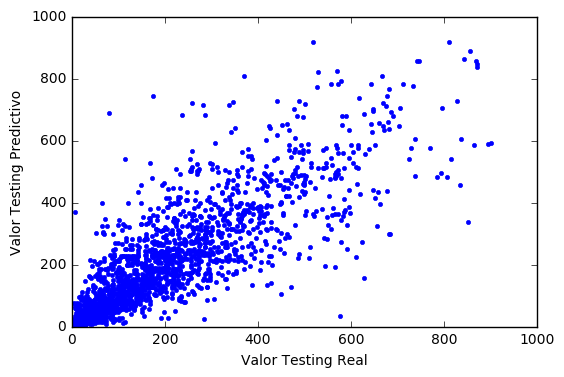

In [4]:
#2.b
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt
def eval_bikemodel(y_predict,y_true):
        diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
        return np.sqrt(np.sum(np.square(diff))/len(y_predict))
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL TEST =%f"%kagg_test
print "KAGG EVAL VALIDATION =%f"%kagg_val
plt.plot(Y_test,Y_pred_test,'.')
plt.xlabel('Valor Testing Real')
plt.ylabel('Valor Testing Predictivo')
plt.show()

Observando el gráfico se ve una tendencia de predicción decente para valores bajos, pero en general mala para valores altos, aunque se observan muchos casos en donde los valores de predicción y reales discrepan en demasía, ya que si se considera que si se acertara el 100% de las veces se tendría una recta con pendiente 1 pasando por el (0,0), y en el observado se encuentra una dispersión general.

Además, se observa de los valores de la evaluación de la función proporcionada para el concurso (que llamaremos KAGG EVAL), están entre los 0.55 y 0.6 para los datos de test y validación, en cambio tiene un valor de 0.028516 para los datos de training. Esto es claramente un problema de sobreajuste al modelo de entrenamiento.





### 2.2.c. Mejorar el árbol de regresión (hiper-parámetros)

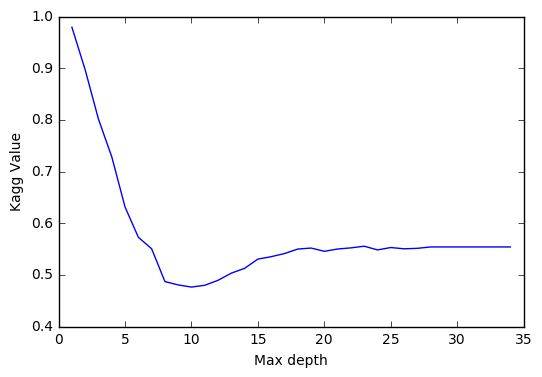

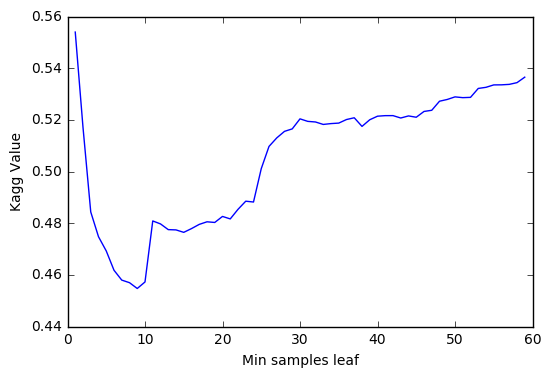

Mejor valor para máximo niveles: 10
Mejor valor para mínimo de datos por hoja: 9
 


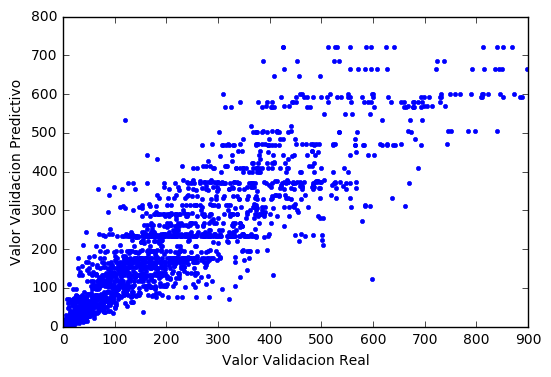

KAGG EVAL VAL =0.451062


In [5]:
#2.c
%matplotlib inline
best_depth=100
best_error =100
lista_kagg = []
for depth in range(1,35):
    model = Tree(random_state=0,max_depth=depth)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    lista_kagg.append(kagg_val)
    if (best_error > kagg_val) :
        best_error = kagg_val
        best_depth = depth
 
plt.plot(range(1,35),lista_kagg)
plt.xlabel("Max depth")
plt.ylabel("Kagg Value")
plt.show()

best_error =100
best_leaf = 1
lista_kagg = []
for leaf in range(1,60):
    model = Tree(random_state=0,min_samples_leaf=leaf)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    lista_kagg.append(kagg_val)
    if (best_error > kagg_val) :
        best_error = kagg_val
        best_leaf = leaf

plt.plot(range(1,60),lista_kagg)
plt.xlabel("Min samples leaf")
plt.ylabel("Kagg Value")
plt.show()

print "Mejor valor para máximo niveles: %d\nMejor valor para mínimo de datos por hoja: %d\n "%(best_depth,best_leaf)

model = Tree(random_state=0,max_depth=best_depth,min_samples_leaf=best_leaf)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)

plt.plot(Y_val,Y_pred_val,'.')
plt.xlabel('Valor Validacion Real')
plt.ylabel('Valor Validacion Predictivo')
plt.show()
print "KAGG EVAL VAL =%f"%kagg_val

Se busca ajustar dos parámetros del árbol: la máxima profundidad y cantidad mínima de datos por hoja. Así, en los primeros dos gráficos observamos cómo se mueven los valores para este problema si se mantienen los valores por defecto y solo se varia el que está en estudio. Obteniéndose como resultado que los mejores valores para construir el árbol son un máximo de 10 niveles de profundidad y un mínimo de 9 datos por hoja.

El último gráfico además muestra como los datos se ven un poco más cercanos a la recta esperada, lo que además se corrobora con el casi 0.10 puntos de mejoría respecto al árbol sin determinar valores de entrada (0.553973 -> 0.451062).




### 2.2.d. Mejorar el árbol de regresión

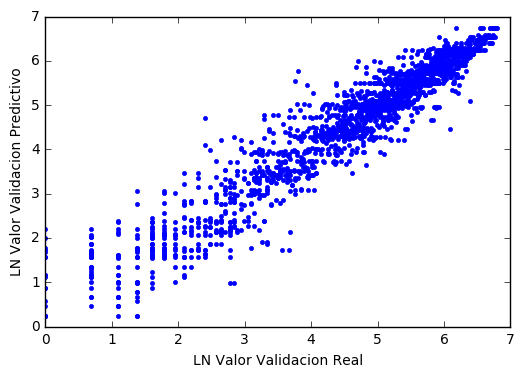

KAGG EVAL VALIDATION =0.402686


In [6]:
#2.d
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing


dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%m')) #agregar mes del año
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%y')) #agregar año
df['year'] = pd.to_numeric(df['year'])


df['count']=df['count'].apply(np.log) #aplicar logaritmo natural al target

#df['windspeed']=np.add(df['windspeed'],5)
#df['windspeed']=np.power(df['windspeed'],-1)  
#df['windspeed']=df['windspeed'].apply(np.log1p)

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','month','year']]
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values

Ydf=df.ix[:,'count']
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0,max_depth=best_depth,min_samples_leaf=best_leaf)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)

plt.plot(Y_val,Y_pred_val,'.')
plt.xlabel('LN Valor Validacion Real')
plt.ylabel('LN Valor Validacion Predictivo')
plt.show()

kagg_val = eval_bikemodel(np.exp(Y_pred_val),np.exp(Y_val))
print "KAGG EVAL VALIDATION =%f"%kagg_val

En esta última parte, se experimentó cambiando parte de los datos y transformándolos o ajustándolos a valores esperados. Es por esto que se extrajo mayor información desde los datos de fecha y hora de bicicletas, estos son mes y año.

Por otra parte, se aplicó la función logaritmo natural a los datos de conteo de préstamos de bicicletas (count).

Se intentó además aplicar funciones de logaritmo o raíz a la velocidad del viento y ajustar a una normal los valores de las temperaturas, pero no se obtuvo tan buenos resultados por lo que se excluyeron.

Así se obtuvo una mejoría de 0.5 puntos en los datos de validación, y se puede observar en los datos graficados que la dispersión se reduce y no existen datos tan alejados entre predicción y valor real.




### 2.2.e. Entrenar SVM no lineal

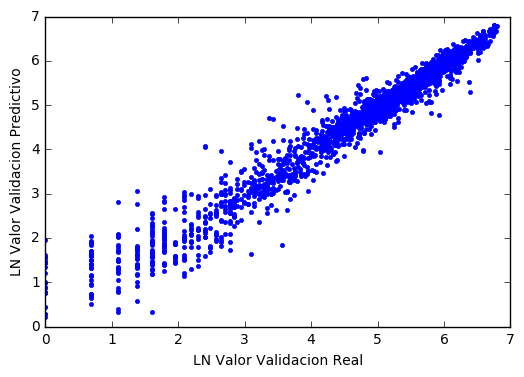

KAGG EVAL VALIDATION =0.292625


In [7]:
#2.e
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)

df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%m')) #agregar mes del año
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%y')) #agregar año
df['year'] = pd.to_numeric(df['year'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','month','year']]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday','month','year'])

df['count']=df['count'].apply(np.log) #aplicar logaritmo natural al target

Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values


from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

plt.plot(Y_val,Y_pred_val,'.')
plt.xlabel('LN Valor Validacion Real')
plt.ylabel('LN Valor Validacion Predictivo')
plt.show()

kagg_val = eval_bikemodel(np.exp(Y_pred_val),np.exp(Y_val))
print "KAGG EVAL VALIDATION =%f"%kagg_val

Se entrenó una SVM no lineal con parámetros por defecto (C=1, épsilon=0.1). Con los datos anteriores transformados, a los que además se les aplicó un escalamiento de los datos para que sean comparables y una transformación de los datos de categoría de tal forma que se representen como valores binarios, trinarios u otros dependiendo de la cantidad de valores posibles a tomar.

Se observa un mucho mejor desempeño, KAGG EVAL en el set de validación es mejor cerca de 0,1 puntos en comparación al mejor resultado obtenido hasta ahora del árbol de regresión. Esta "mejora" de 0.402686 a 0.292625, es debido a que el problema es altamente no lineal, de esta forma es más probable que un método como SVM no lineal tenga mejores resultados dada su capacidad de generar la regresión en un hiperplano, cosa que los árboles de clasificación no pueden hacer, ya que solo dividen el espacio en base a reglas.



### 2.2.f. Mejorar la SVM

Con C=0.500000 y epsilon=0.010000 se obtiene KAGG EVAL VALIDATION =0.305082

Con C=0.500000 y epsilon=0.050000 se obtiene KAGG EVAL VALIDATION =0.304989

Con C=0.500000 y epsilon=0.100000 se obtiene KAGG EVAL VALIDATION =0.307293

---------------------------------------------------------------------------

Con C=1.000000 y epsilon=0.010000 se obtiene KAGG EVAL VALIDATION =0.292473

Con C=1.000000 y epsilon=0.050000 se obtiene KAGG EVAL VALIDATION =0.290587

Con C=1.000000 y epsilon=0.100000 se obtiene KAGG EVAL VALIDATION =0.292625

---------------------------------------------------------------------------

Con C=1.200000 y epsilon=0.010000 se obtiene KAGG EVAL VALIDATION =0.291024

Con C=1.200000 y epsilon=0.050000 se obtiene KAGG EVAL VALIDATION =0.289142

Con C=1.200000 y epsilon=0.100000 se obtiene KAGG EVAL VALIDATION =0.290924

---------------------------------------------------------------------------

Con C=1.400000 y epsilon=0.010000 se obtiene KAGG EVAL VALIDATION =0.290668


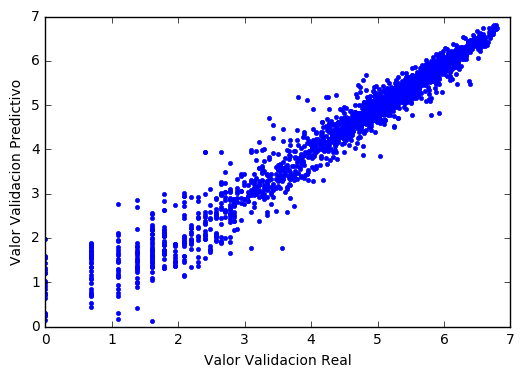

KAGG EVAL TRAIN =0.220828
KAGG EVAL VAL =0.287996


In [9]:
#2.f
c = [0.5,1,1.2,1.4,1.5,1.6,1.7,1.8,1.9,2]
e = [0.01,0.05,0.1]
lista_kagg = []
best_error =100
bestc = 0
beste = 0
for c1 in c:
    for e1 in e: 
        model = SVR(C=c1, epsilon =e1)
        model.fit(X_train,Y_train)
        Y_pred_val = model.predict(X_val)
        kagg_val = eval_bikemodel(np.exp(Y_pred_val),np.exp(Y_val))
        print "Con C=%f y epsilon=%f se obtiene KAGG EVAL VALIDATION =%f\n"%(c1,e1,kagg_val)
        lista_kagg.append(kagg_val)
        if (best_error > kagg_val) :
            best_error = kagg_val
            bestc = c1
            beste = e1
    print "---------------------------------------------------------------------------\n"

print "Mejores valores: C= %f , epsilon = %f, con un KAGG EVAL VALIDATION =%f"%(bestc,beste,best_error)


model = SVR(C=bestc, epsilon =beste)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
plt.plot(Y_val,Y_pred_val,'.')
plt.xlabel('Valor Validacion Real')
plt.ylabel('Valor Validacion Predictivo')
plt.show()

kagg_train = eval_bikemodel(np.exp(Y_pred_train),np.exp(Y_train))
kagg_val = eval_bikemodel(np.exp(Y_pred_val),np.exp(Y_val))
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val

Como se sabe, el parámetro C le indica a la optimización SVM cuánto desea evitar la clasificación errónea de cada ejemplo de formación. Para valores grandes de C, la optimización elegirá un híperplano de margen más pequeño si ese híperplano hace un mejor trabajo de conseguir que todos los puntos de entrenamiento estén clasificados correctamente. Por el contrario, un valor muy pequeño de C hará que el optimizador busque un híperplano de separación de mayor margen, incluso si ese híperplano clasifica erróneamente más puntos. Épsilon por su parte determina el ancho de la banda desde el híperplano, ignorando posibles errores, por lo que el modelo dependerá solo de los datos que estén fuera de esta banda.

En este caso, se observa que el valor de C que da mejores resultados de los probados es 1.6 con un épsilon de 0.05 entregando un KAGG EVAL en el set de validación de 0.287996.

Este valor de KAGG EVAL es el mejor obtenido hasta el momento, pero comparado con lo obtenido sin buscar los mejores parámetros (resultado anterior) es bastante bajo. De hecho, casi todos los valores de parámetros probados entregan valores similares.



### 2.2.g. Evaluar usando Cross Validation

In [21]:
## 2.g
from sklearn.svm import SVR
from sklearn import cross_validation

print "-------------TREE--------------"

Ydf=df.ix[:,'count']
Y_train = Ydf[0:nval].values
Y_test = Ydf[nval:].values
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','month','year']]
X_train = Xdf[0:nval].values
X_test = Xdf[nval:].values

k_fold = cross_validation.KFold(len(X_train),10)
best_depth=0
best_leaf=0
best_error =100
for depth in range (9,22):
    for leaf in range(3,15):
        score_cv = 0
        for k, (train, val) in enumerate(k_fold):
            model = Tree(random_state=0,max_depth=depth, min_samples_leaf=leaf)
            model.fit(X_train[train], Y_train[train])
            Ypred_val = model.predict(X_train[val])
            Ytrue_val = Y_train[val]   
            score_fold = eval_bikemodel(np.exp(Ypred_val),np.exp(Ytrue_val))
            score_cv += score_fold
        score_cv = score_cv / 10
        if (best_error > score_cv) :
            best_error = score_cv
            best_depth=depth
            best_leaf=leaf
            print "MAX depth= %d    MIN leaf= %d   =>  kaggeval= %f\n"%(best_depth,best_leaf,best_error)


-------------TREE--------------
MAX depth= 9    MIN leaf= 3   =>  kaggeval= 0.452973

MAX depth= 10    MIN leaf= 3   =>  kaggeval= 0.437493

MAX depth= 11    MIN leaf= 3   =>  kaggeval= 0.432979

MAX depth= 12    MIN leaf= 6   =>  kaggeval= 0.430801

MAX depth= 13    MIN leaf= 3   =>  kaggeval= 0.429883

MAX depth= 13    MIN leaf= 6   =>  kaggeval= 0.427722

MAX depth= 14    MIN leaf= 6   =>  kaggeval= 0.427608

MAX depth= 15    MIN leaf= 6   =>  kaggeval= 0.427535

MAX depth= 16    MIN leaf= 6   =>  kaggeval= 0.427143



Realizando validación cruzada para determinar los valores que definen el árbol de regresión se obtienen valores bastante diferentes que los que se asumían en un principio. Mientras la profundidad máxima paso de tener su mejor valor en 10 a 16, la cantidad mínima de datos por hoja pasó de 9 a 6. Esto refleja que en este segundo caso se optó por entregar la posibilidad de generar un árbol con más reglas y menor cantidad de datos en las hojas, lo que le dio mayor libertad para obtener un mejor resultado. Esto es lógico de pensar, si se tuviera un árbol con el mayor sobreajuste posible, sería uno muy profundo y que permita la menor cantidad de datos por hoja.

Sobre los KAGG EVAL se observa que son bastante cercanos a los ya obtenidos para el mejor árbol "empeorando" desde un 0.402686 a 0.427143, baja que era esperable al utilizar una técnica para evaluar como CV.



Usando CV para la SVM:

In [26]:
Ydf=df.ix[:,'count']
Y_train = Ydf[0:nval].values
Y_test = Ydf[nval:].values
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','month','year']]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday','month','year'])
X_train = Xdf[0:nval].values
X_test = Xdf[nval:].values

scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

c = [1,1.2,1.4,1.5,1.6,1.7,1.8]
e = [0.05,0.1]
print "-------------SVM--------------"
k_fold = cross_validation.KFold(len(X_train),10)
best_error =100
bestc = 0
beste = 0
for c1 in c:
    for e1 in e:    
        score_cv = 0
        for k, (train, val) in enumerate(k_fold):
            model = SVR(C=c1, epsilon =e1)
            model.fit(X_train[train], Y_train[train])
            Ypred_val = model.predict(X_train[val])
            Ytrue_val = Y_train[val]   
            score_fold = eval_bikemodel(np.exp(Ypred_val),np.exp(Ytrue_val))
            score_cv += score_fold
        score_cv = score_cv / 10
        if (best_error > score_cv) :
            best_error = score_cv
            bestc = c1
            beste = e1
            print "C= %f  epsilon = %f   =>  kaggeval= %f\n"%(bestc,beste,best_error)


-------------SVM--------------
C= 1.000000  epsilon = 0.050000   =>  kaggeval= 0.305019

C= 1.200000  epsilon = 0.050000   =>  kaggeval= 0.303537

C= 1.200000  epsilon = 0.100000   =>  kaggeval= 0.303391

C= 1.400000  epsilon = 0.050000   =>  kaggeval= 0.302621

C= 1.400000  epsilon = 0.100000   =>  kaggeval= 0.302329

C= 1.500000  epsilon = 0.100000   =>  kaggeval= 0.302113

C= 1.600000  epsilon = 0.100000   =>  kaggeval= 0.302070



En el caso de CV para SVM, se observa que el cambio de parámetros no proporciona una mejoría considerable a lo ya obtenido pasando de un KAGG EVAL de 0.287996 a uno de 0.302070. Se mantuvo el valor de C óptimo (1.6), pero el valor de épsilon aumento de 0.05 a 0.1.

Al igual que en el caso anterior, los cambios en los parámetros no generaban la suficiente mejoría como para afirmar que alguno sea efectivamente el valor correcto a utilizar para el caso "real".



### 2.2.h. Ensamblar dos máquinas según predicción de tipo de usuario

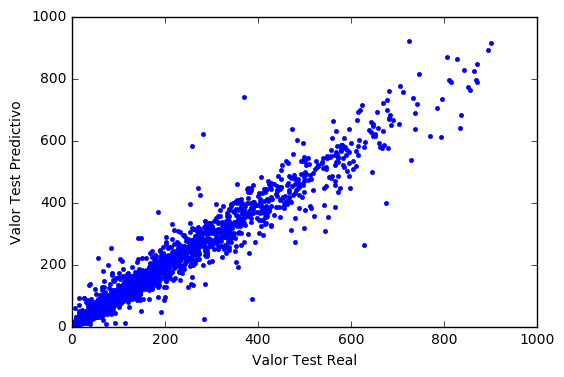

KAGG EVAL TEST =0.307498


In [12]:
#2.h

YdfT=df.ix[:,'count'] #demanda total
Y_train = YdfT[0:nval].values
Y_test = YdfT[nval:].values

YdfR=np.log1p(df.ix[:,'registered']) #demanda registrada
Y_trainR = YdfR[0:nval].values
Y_testR = YdfR[nval:].values

YdfC=np.log1p(df.ix[:,'casual']) #demanda casual
Y_trainC = YdfC[0:nval].values
Y_testC = YdfC[nval:].values

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','month','year']]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday','month','year'])

X_train = Xdf[0:nval].values
X_test = Xdf[nval:].values
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

modelR = SVR(C=bestc,epsilon=beste)
modelR.fit(X_train,Y_trainR)
Y_pred_testR = modelR.predict(X_test)

modelC = SVR(C=bestc,epsilon=beste)
modelC.fit(X_train,Y_trainC)
Y_pred_testC = modelC.predict(X_test)

Y_pred_test = (np.exp(Y_pred_testR)-1 )+ (np.exp(Y_pred_testC)-1)

plt.plot(np.exp(Y_test),Y_pred_test,'.')
plt.xlabel('Valor Test Real')
plt.ylabel('Valor Test Predictivo')
plt.show()

kagg_test = eval_bikemodel(Y_pred_test,np.exp(Y_test))
print "KAGG EVAL TEST =%f"%kagg_test


Entrenando dos máquinas SVM especializadas en el conteo de personas registradas y otra que no (casuales), y posteriormente ensamblándolas se obtuvo un buen KAGG EVAL para los datos de prueba igual a 0.307498.

Es natural pensar que ambos tipos de usuarios tienen comportamientos diferentes y así lo demostró la experimentación, en donde cada máquina logró un buen desempeño especializado para su objetivo, y al ensamblarlas tener una mejor cobertura de la solución que se busca. Esto mismo podría aplicarse con otros tipos de especialización, como considerar todo lo que tenga que referencia con fechas y horas, o con lo que tiene que ver con clima y dificultades físicas y prácticas para los ciclistas.




### 2.2.i. Evaluar el efecto de utilizar algoritmo genérico de ensamblamiento de MdA

In [27]:
#2.i
from sklearn.ensemble import RandomForestRegressor

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','month','year']]
#Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday','month','year'])

Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

lista_kagg_val= []
lista_kagg_train= []
best_error_val = 100
best_error_train = 100
best_m_val = 0
best_m_train = 0
for m in range(2,120):
    model = RandomForestRegressor(n_estimators=m,max_depth=16, min_samples_leaf= 6,random_state=0)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_val = model.predict(X_val)
    Y_pred_test = model.predict(X_test)
    kagg_val = eval_bikemodel(np.exp(Y_pred_val),np.exp(Y_val))
    kagg_train = eval_bikemodel(np.exp(Y_pred_train),np.exp(Y_train))
    lista_kagg_val.append(kagg_val)
    lista_kagg_train.append(kagg_train)
    if (best_error_val > kagg_val) :
        best_error_val = kagg_val
        best_m_val = m   
        print "Para %d Máquinas se obtiene KAGG EVAL VAL = %f"%(best_m_val,best_error_val)
    if (best_error_train > kagg_train) :
        best_error_train = kagg_train
        best_m_train = m   
        print "Para %d Máquinas se obtiene KAGG EVAL TRAIN = %f"%(best_m_train,best_error_train)    


Para 2 Máquinas se obtiene KAGG EVAL VAL = 0.362982
Para 2 Máquinas se obtiene KAGG EVAL TRAIN = 0.302726
Para 3 Máquinas se obtiene KAGG EVAL VAL = 0.341991
Para 3 Máquinas se obtiene KAGG EVAL TRAIN = 0.283668
Para 4 Máquinas se obtiene KAGG EVAL VAL = 0.337455
Para 4 Máquinas se obtiene KAGG EVAL TRAIN = 0.277798
Para 5 Máquinas se obtiene KAGG EVAL VAL = 0.336103
Para 5 Máquinas se obtiene KAGG EVAL TRAIN = 0.273225
Para 6 Máquinas se obtiene KAGG EVAL TRAIN = 0.271616
Para 7 Máquinas se obtiene KAGG EVAL TRAIN = 0.270044
Para 8 Máquinas se obtiene KAGG EVAL TRAIN = 0.268881
Para 9 Máquinas se obtiene KAGG EVAL VAL = 0.335720
Para 9 Máquinas se obtiene KAGG EVAL TRAIN = 0.267157
Para 10 Máquinas se obtiene KAGG EVAL VAL = 0.334814
Para 10 Máquinas se obtiene KAGG EVAL TRAIN = 0.265822
Para 12 Máquinas se obtiene KAGG EVAL VAL = 0.334478
Para 14 Máquinas se obtiene KAGG EVAL VAL = 0.334191
Para 14 Máquinas se obtiene KAGG EVAL TRAIN = 0.265456
Para 15 Máquinas se obtiene KAGG EVAL V

Se observa los valores obtenidos para cada cantidad de máquinas de aprendizaje en el siguiente gráfico:

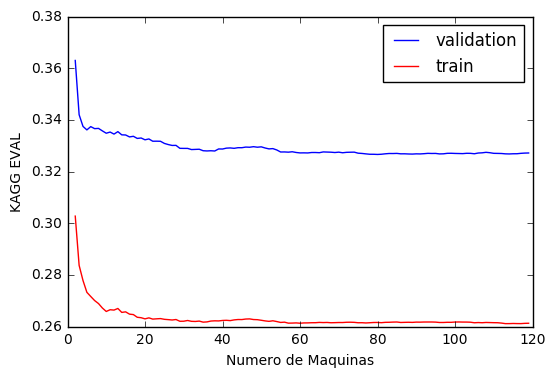

In [28]:
plt.plot(range(2,120),lista_kagg_val,"b" , label="validation")
plt.plot(range(2,120),lista_kagg_train,"r", label="train")
plt.xlabel('Numero de Maquinas')
plt.ylabel('KAGG EVAL')
plt.legend()
plt.show()

Se aprecia que existe una "curva de mejora" y en cierto punto, agregar más máquinas en el ensamblado genera poca mejoría a la solución, esto para el caso de entrenamiento y de validación. Como se sabe, la idea de crear varias máquinas (árboles en este caso) para que respondan parte de la solución, es para que cada una pueda "especializarse" en una parte de los datos y predecirlos de buena forma. existe una baja considerable al principio (antes de las 10 máquinas) ya que la especialización se cumple. El problema es que la capacidad de diferenciarse y aportar de las nuevas máquinas es muy baja, por lo que solo se aconsejaría tener grandes cantidades de máquinas en problemas donde el pequeño porciento de mejoría en la predicción sea determinante. Como este no es el caso, no se recomiendan más de 20 árboles para predecir este problema, ya que con un kagg eval cerca de 0.332268 ya se logra superar el mejor valor obtenido por árboles sin considerar las características de casual y registrado.